<a href="https://colab.research.google.com/github/ev1025/CS_Project2/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section. 2 Project 주식데이터 분석

- 주식은 굉장히 복잡적인 요소에 따라서 오르고 내린다.
- 실제적으로 다양한 지표들이 주식과 연관이 있는지, 있다면 언제 주식을 사는 것이 좋을지 알아보고자 한다.

### 가설
1. 각 지표들은 주식과 연관이 있을 것이다.
2. 연관있는 지표들을 기반으로 주식의 적절한 구매시기를 예측할 수 있다.

### 주식과 각지표의 관계

**1. 물가**
- 물가가 안정적일 때 사람들은 미래를 설계하며 안정적인 투자활동을 하고, 주식도 상승하게된다.
- 물가가 높을 때 사람들은 불안에 떨며 지갑을 닫고 주식을 팔게 되고 정부는 높은 물가를 잡기 위해 금리를 올려서 결과적으로 기업의 이자부담이 늘어 주가가 떨어지게 된다.(현재 상황)

**2.환율**   

`상식`    
- 환율이 오르면 수출로 벌어들이는 돈이 많아지고 기업의 성과가 좋아져 주식이 오른다.  

`사실`
- 환율 하락 : 주식상승(기업의 수출증가, 외국인 유출), 수출을 많이해서 달러공급이 높으면, 달러의 가격이 하락한다.     
- 환율 상승 : 주식하락(기업의 수출감소, 외국인 유입), 수출이 적으면 달러공급이 적어져서 달러의 가치가 상승한다.      
- 환율이 비쌀 때 한국에 투자를 하던 외국인들이 환율이 저렴해지면 주식을 팔고 나감( 달러를 비싸게 팔고, 싸게 사서 나감)   


 

**3. 금리**
- 금리가 하락하면 사람들이 주식이나 펀드로 눈을 돌림, 기업의 이자부담이 줄어 투자활동 활발 -> 주식상승
- 금리가 상승하면 사람들이 채권이나 저축을 하게되고, 기업의 이자부담이 늘어 소극적 투자활동을 하게됨 -> 주식하락

**4. 부동산**
- 유동성, 수요, 공급에 따라 오르고 내림
- 주식시장의 상승,하락과 상관 없이 지속적으로 상승
- 현금의 유동성이 클 때 주식,부동산 모두 상승한다.
- 이유 : 주식을 팔고 집을 사는 경우는 있지만, 집을 팔고 주식을 사는 경우는 드물다.

**5. 외국인 보유비중**
- 한국 주식시장이 좋지 않을 때 외국인 비중이 어떤가?


# 데이터 전처리

- 데이터는 직접 가공하였으며, 2005년~ 2022년 자료를 사용하였다.

- 코스피 : 한국거래소 유가증권시장의 종합주가지수
- 코스닥 : 코스닥 시장에 상장된 기업의 종합주가지수
- 기준금리 : 한국은행의 금리, 한국 금리체계의 기준이 되는 금리
- 달러 : 미국달러를 한국화폐로 환산한 가격
- 거래대금(외) : 외국인의 누적 한국주식투자 거래대금
- 주택판매가격 : 전국 주택판매가격추이
- 소비자물가 : 미국 달러를 한국 화폐로 환산한 가격

**일단위 데이터**

- stocks, dolor, gold, foreigner

**월단위 데이터**

- stock_month, gold_month,dolor_month, foreigner, price, earth, thing

**병합 데이터**
- all(일별데이터) = 코스피, 코스닥, 기준금리, 달러, 거래대금 
- month = 월단위 데이터들

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 네이버 나눔 폰트 설치, 런타임재시작 후 plt.rc('font', family='NanumBarunGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/주가지수.csv')       # 주가지수(코스피, 코스닥)
df2 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/기준금리.csv')       # 한국은행 기준금리
df3 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/달러환율.csv')       # 달러
df4 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/주택매매가격.csv')   # 주택매매가격 
df6 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/외국인보유.csv')     # 외국인보유지분
df7 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/소비자물가지수_월별.csv') # 소비자 물가지수 
df9 = pd.read_csv('/content/gdrive/MyDrive/코드스테이츠/프로젝트/프로젝트2/삼성전자.csv', encoding='cp949')  # 삼성전자 시가총액

In [4]:
# 원본데이터 손상시키지 않도록 카피
stocks = copy.deepcopy(df1)
gold = copy.deepcopy(df2)
dolor = copy.deepcopy(df3)
price = copy.deepcopy(df4)
earth = copy.deepcopy(df5)
foreigner = copy.deepcopy(df6)
thing = copy.deepcopy(df7)
invest = copy.deepcopy(df8)
samsung = copy.deepcopy(df9)

In [ ]:
# 월별 삼섬 시가총액
samsung.iloc[:,0] = pd.to_datetime(samsung.iloc[:,0])
samsung.index = samsung.iloc[:,0]
samsung = samsung.iloc[:,9].round(2)
samsung = pd.DataFrame(samsung)

samsung_month = samsung.resample('M').mean().round(2)
samsung_month.head()

In [6]:
# 일자별 코스피, 코스닥
stocks = stocks.dropna(axis=1).iloc[:,4:].T    # 코스피, 코스닥 일별
stocks.columns = ['코스피', '코스닥']          

stocks.index = pd.to_datetime(stocks.index)    # 인덱스 타입 DateIndex로 변경

stocks.코스피 = stocks.코스피.replace(',','', regex = True).astype('float') # ',' 제거하고 수치형으로 변경(str+numeric data에 str.replace 할 경우 Nan값 생성)
stocks.코스닥 = stocks.코스닥.replace(',','', regex = True).astype('float') #  str을 지우고, regex =True로 하면 일부 ','도 치환

In [7]:
# 월별 코스피, 코스닥
stocks_month = stocks.resample('M').mean().round(2)        # 'M' 월 단위로 데이터 묶어서 평균냄 / 주식 월단위 데이터
stocks_month.index = stocks_month.index.strftime("%Y-%m")  # strftime으로 인덱스 표시형식 변경
stocks_month.index = pd.to_datetime(stocks_month.index)

In [8]:
# 월 기준금리
gold = gold.dropna(axis=1).T  # 기준금리 월단위
gold.columns = ['기준금리'] 
gold = gold.iloc[4:]          
gold_month = copy.deepcopy(gold)
gold_month.index = pd.to_datetime(gold_month.index)

gold.index = pd.to_datetime(gold.index).strftime("%Y-%m-%d") # 데이터형식 변경
gold.index = gold.index.astype('datetime64[ns]')             # 데이터타입 변경
gold.drop(gold.index[gold.index < '2003-01-01'], inplace = True) # 데이터 제거
gold_skewed = 1/gold


In [9]:
# 일자별 달러
dolor = dolor.loc[:,'2003/01/02':].T  # 달러
dolor.columns = ['달러']
dolor.index = pd.to_datetime(dolor.index)
dolor = dolor.replace(',','',regex =True).astype(float)
# dolor = np.log1p(dolor)

In [10]:
# 월별 달러
dolor_month = dolor.resample('M').mean().round(2) # 월단위 달러
dolor_month.index = dolor_month.index.strftime("%Y-%m")
dolor_month.index = pd.to_datetime(dolor_month.index)

In [11]:
# 월별 외국인 주식거래대금
foreigner = foreigner.iloc[:,5:]                # 외국인 주식 거래대금 월단위
foreigner = foreigner.replace(',','',regex=True).astype(int)  # 
foreigner.iloc[0] =foreigner.iloc[2:5].sum() - foreigner.iloc[0:2].sum()
foreigner = foreigner.T
foreigner = foreigner.drop([1,2,3,4], axis=1)
foreigner.index = pd.to_datetime(foreigner.index)
foreigner.columns = ['거래대금(외)']
foreigner_skewed = 1/np.cumsum(foreigner)
foreigner = np.cumsum(foreigner)

In [12]:
# 월별 주택판매가격
price = price.iloc[:,5:].T # 주택판매가격 2003/11 월단위
price.columns = ['주택판매가격']
price.index = pd.to_datetime(price.index)

In [13]:
# 월별 지가 변동률
earth = earth.iloc[:,4:].T # 지가변동률 2005/01 월단위
earth.columns = ['지가변동률']
earth.index = pd.to_datetime(earth.index)
earth_skewed = 1/earth

In [14]:
# 월별 소비자 물가지수
thing = thing.iloc[:,5:].T  # 소비자 물가지수 2004/01 월단위
thing.columns = ['소비자물가']
thing.index = pd.to_datetime(thing.index)

**데이터 병합**

In [16]:
all = pd.concat([stocks,gold],axis=1) # 코스피, 코스닥  + 기준금리 
all.기준금리 = all.기준금리.ffill()
all.dropna(inplace =True)

In [17]:
all = pd.concat([all,dolor], axis= 1 ) # 환율 추가
all.dropna(axis=0, inplace=True)

In [18]:
all = pd.concat([all,foreigner],axis=1) # 달러 2003년 자료 없어서 2003년 드롭
all = all.ffill()
all.dropna(axis=0, inplace=True)

In [19]:
month = pd.concat([stocks_month,gold_month,dolor_month, foreigner, price, thing], axis = 1) # 월별데이터
month.dropna(how='any', axis=0, inplace = True)

In [20]:
all.shape, month.shape

((4739, 5), (223, 7))

# 데이터 분석  

**일자별데이터의 추세 확인**

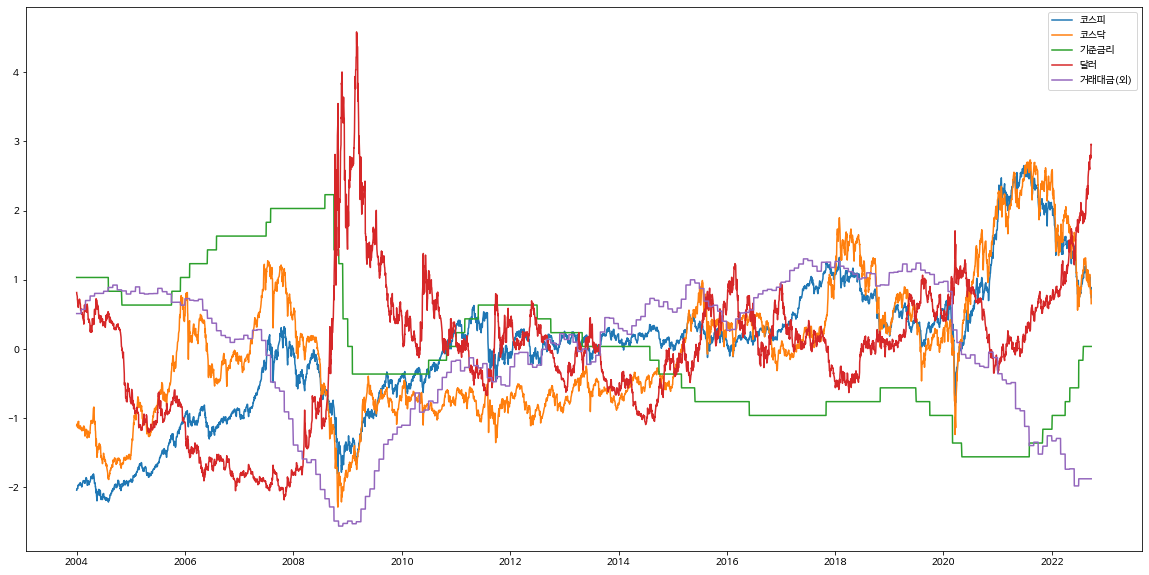

In [72]:
# 일자별 데이터 그래프
plt.rcParams['axes.unicode_minus'] = False

all_graph = copy.deepcopy(all)
all_graph[['코스피','코스닥', '기준금리', '달러', '거래대금(외)']] = scaler.fit_transform(all_graph)
plt.rc('font', family='NanumBarunGothic')  # 한글 폰트
plt.figure(figsize = (20,10))
plt.plot(all_graph['코스피'])
plt.plot(all_graph['코스닥'])
plt.plot(all_graph['기준금리'])
plt.plot(all_graph['달러'])
plt.plot(all_graph['거래대금(외)'])
plt.legend(['코스피','코스닥', '기준금리', '달러', '거래대금(외)'])
plt.show();

**월별데이터 변동이 심한 이유**
- 2008년 서브프라임 모기지, 미국이  경제활성화를 위해 금융규제를 완화하였고 무분별한 집담보대출이 늘어나면서 미국의 금융시장이 붕괴 되어 전 세계로 퍼져나간 사건
- 2020년 코로나19

In [31]:
month_graph = copy.deepcopy(month)
month_graph[['코스피', '코스닥', '기준금리', '달러', '거래대금(외)', '주택판매가격',  '소비자물가']] = scaler.fit_transform(month_graph)

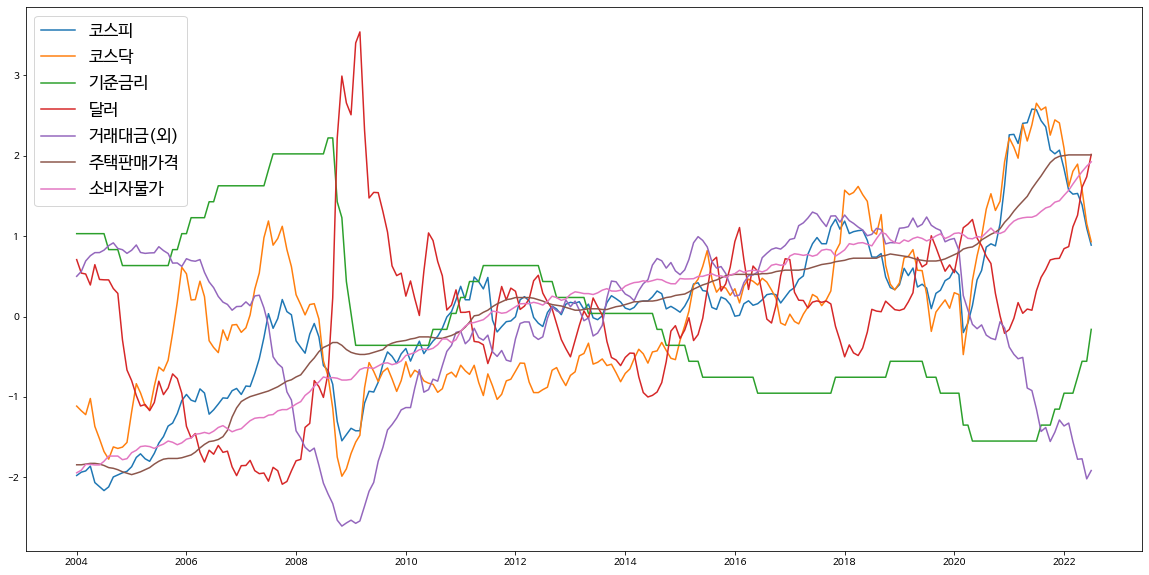

In [76]:
plt.figure(figsize=(20,10))
plt.plot(month_graph)
plt.legend(['코스피', '코스닥', '기준금리', '달러', '거래대금(외)', '주택판매가격' , '소비자물가'],fontsize = 17)
plt.show();

**각 지표별 코스피와의 관계 비교**
- 코스닥과 코스피는 거의 비슷한 흐름을 보임
- 금리와 달러는 실질적으로 관련이 없는 것 같지만, 경제위기에는 동반 상승 또는 동반하락을 하기도함
- 소비자 물가와 주택판매가격은 변동성이 크지 않고 꾸준히 상승
- 외국인들은 경제 위기에 한국 주식을 적극적으로 매도 하는 것을 알 수 있음

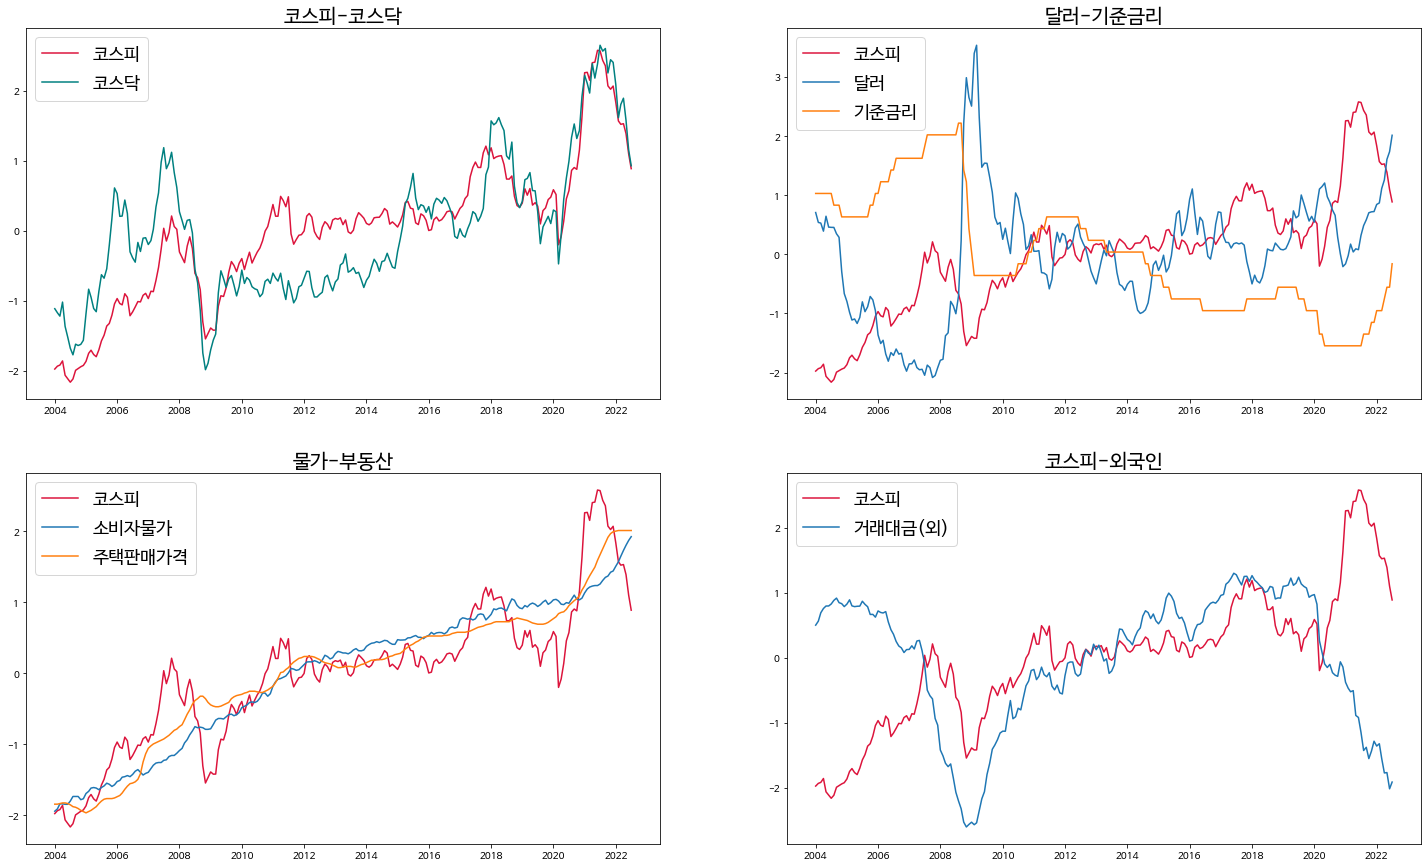

In [74]:
fig, ax = plt.subplots(nrows =2, ncols = 2, figsize=(25,15))

ax[0,0].plot(month_graph['코스피'], color='crimson')
ax[0,0].plot(month_graph['코스닥'], color='teal')
# ax[0,0].plot(month_graph['시가총액'])
ax[0,0].legend(['코스피','코스닥'],fontsize= 18)
ax[0,0].set_title("코스피-코스닥",fontsize=20)

ax[0,1].plot(month_graph['코스피'], color='crimson')
ax[0,1].plot(month_graph[['달러','기준금리']])
ax[0,1].legend(['코스피','달러', '기준금리'],fontsize= 18)
ax[0,1].set_title("달러-기준금리",fontsize=20)

ax[1,0].plot(month_graph['코스피'], color='crimson')
ax[1,0].plot(month_graph[['소비자물가','주택판매가격']])
ax[1,0].legend(['코스피','소비자물가','주택판매가격'],fontsize= 18)
ax[1,0].set_title("물가-부동산",fontsize=20)

ax[1,1].plot(month_graph['코스피'], color='crimson')
ax[1,1].plot(month_graph['거래대금(외)'])
ax[1,1].legend(['코스피', '거래대금(외)'],fontsize= 18)
ax[1,1].set_title("코스피-외국인",fontsize=20)

plt.show();

**각 지표간 상관관계 확인**
- 코스피는 코스닥, 주택판매가격, 소비자물가와 높은 상관관계를 보임
- 기준금리는 코스피와 양의 상관관계를 보임

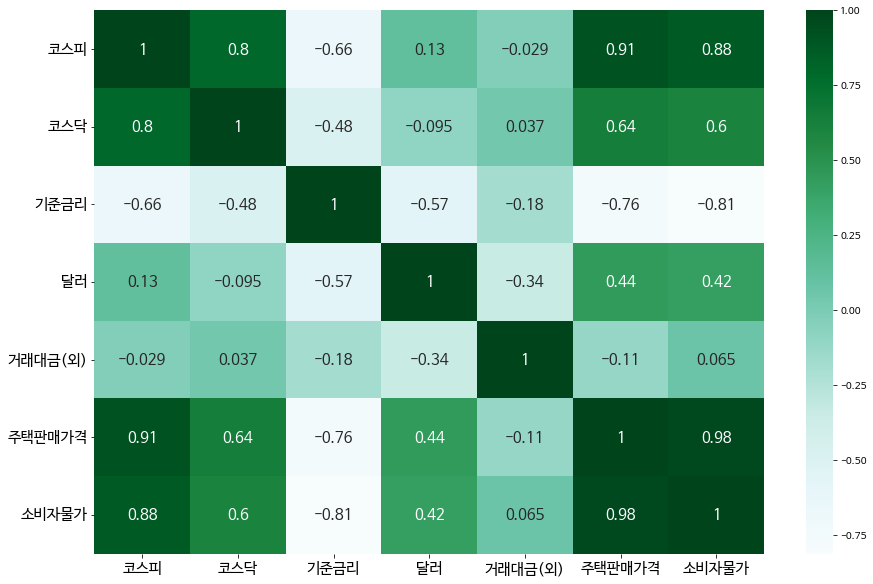

In [79]:
plt.figure(figsize =(15,10))
sns.heatmap(data=month_graph.corr(), annot=True, cmap = 'BuGn', annot_kws={"size" :15})
plt.xticks(fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize=15)

# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

# 데이터 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV

**코스피를 훈련 타겟으로 지정**

In [21]:
x_all = all.drop('코스피',axis=1)
y_all = all['코스피']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size = 0.2, random_state = 42)
x_train_all.shape, y_train_all.shape, x_test_all.shape, y_test_all.shape

((3791, 4), (3791,), (948, 4), (948,))

In [22]:
x_month = month.drop('코스피',axis=1)
y_month = month['코스피']

x_train_mon, x_test_mon, y_train_mon, y_test_mon = train_test_split(x_month, y_month, test_size = 0.2, random_state = 42)

x_train_mon.shape, y_train_mon.shape, x_test_mon.shape, y_test_mon.shape

((178, 6), (178,), (45, 6), (45,))

In [23]:
scaler = StandardScaler()
x_train_all= scaler.fit_transform(x_train_all)
x_test_all = scaler.transform(x_test_all)

In [24]:
x_train_mon = scaler.fit_transform(x_train_mon)
x_test_mon = scaler.transform(x_test_mon)

**기준모델생성**

In [40]:
base_all = y_train_all.mean()
baseline_all = [base_all] * len(y_train_all)

In [41]:
base_month = y_train_mon.mean()
baseline_mon = [base_all] * len(y_train_mon)

In [42]:
all_ols = LinearRegression()
all_ols.fit(x_train_all, y_train_all)
y_pred_all = all_ols.predict(x_train_all)

In [ ]:
# 회귀평가지표
def score(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, rmse, r2

**일자별 데이터 회귀평가지표**

In [88]:
base_mae, base_mse, base_rmse, base_r2 = score(y_train_all, baseline_all)
all_mae, all_mse, all_rmse, all_r2 = score(y_train_all, y_pred_all)

table_base = pd.DataFrame(index =['mae', 'mse', 'rmse', 'r2' ], columns = ['base', 'multiple'])
table_base['base'] = [base_mae, base_mse, base_rmse, base_r2]
table_base['multiple'] = [all_mae, all_mse, all_rmse, all_r2]

round(table_base,2)

,base,multiple
mae,390.54,211.28
mse,280884.13,65703.87
rmse,529.99,256.33
r2,0.00,0.77


In [86]:
print('회귀계수')
print('-----------------------------')
print(f"{all.columns[1]}:{all_ols.coef_[0]}")
print(f"{all.columns[2]}:{all_ols.coef_[1]}")
print(f"{all.columns[3]}:{all_ols.coef_[2]}")
print(f"{all.columns[4]}:{all_ols.coef_[3]}")

회귀계수
-----------------------------
코스닥:283.6021912152327
기준금리:-289.8261062065607
달러:-108.74154668403017
거래대금(외):-117.90146064165967


**월별데이터 회귀평가지표**

In [44]:
mon_ols = LinearRegression()
mon_ols.fit(x_train_mon, y_train_mon)
y_pred_mon = mon_ols.predict(x_train_mon)
y_pred_test_mon = mon_ols.predict(x_test_mon)

In [45]:
base_mae_m, base_mse_m, base_rmse_m, base_r2_m = score(y_train_mon, baseline_mon)
mon_mae, mon_mse, mon_rmse, mon_r2 = score(y_train_mon, y_pred_mon)
mon_mae_test, mon_mse_test, mon_rmse_test, mon_r2_test = score(y_test_mon, y_pred_test_mon)

table_mon = pd.DataFrame(index = ['mae', 'mse', 'rmse', 'r2'], columns=['base','multiple'])
table_mon['base'] = [base_mae_m, base_mse_m, base_rmse_m, base_r2_m]
table_mon['multiple'] = [mon_mae, mon_mse, mon_rmse, mon_r2]
table_mon['test'] = [mon_mae_test, mon_mse_test, mon_rmse_test, mon_r2_test]
round(table_mon,2)

,base,multiple,test
mae,397.40,94.59,111.03
mse,285663.61,15213.08,19577.15
rmse,534.48,123.34,139.92
r2,-0.00,0.95,0.92


#### **데이터 검증**

In [46]:
 # 일자별데이터 검증결과(다소 높음)
result_all = cross_val_score(
    all_ols,
    x_train_all,
    y_train_all,
    cv = 10,
    n_jobs = -1,
    scoring = 'r2'
)
result_all = result_all.mean()
print(f"일자별 예측 결과 : {all_r2:.2f}")
print(f"일자별 검증 결과 : {result_all:.2f}")

일자별 예측 결과 : 0.77
일자별 검증 결과 : 0.76


In [47]:
result_mon = cross_val_score(   # 월별 데이터 검증결과(너무높음)
    mon_ols,
    x_train_mon,
    y_train_mon,
    cv = 10,
    n_jobs = -1,
    scoring='r2'
)
result_mon = result_mon.mean()
print(f"월별 예측 결과 : {mon_r2:.2f}")
print(f"월별 검증 결과 : {result_mon:.2f}")

일자별 예측 결과 : 0.95
일자별 검증 결과 : 0.94


**일자별 데이터 RidgeCV, LassoCV**

In [49]:
ralpha = np.arange(1,100, 1)
rcv_all = RidgeCV(alphas=ralpha, cv = 10 )
rcv_all.fit(x_train_all, y_train_all)

print(f"최적의 알파 : {rcv_all.alpha_}")
print(f"훈련 스코어 :{rcv_all.score(x_train_all, y_train_all):.2f}")
print(f"테스트 스코어 : {rcv_all.score(x_test_all, y_test_all):.2f}")

최적의 알파 : 2
훈련 스코어 :0.77
테스트 스코어 : 0.77


In [50]:
lalpha = np.arange(1, 100, 1)

lcv_all = LassoCV(alphas = lalpha, cv= 10, tol=1)
lcv_all.fit(x_train_all, y_train_all)

print(f"최적의 알파 : {lcv_all.alpha_}")
print(f"훈련스코어 : {lcv_all.score(x_train_all, y_train_all):.2f}")
print(f"테스트 스코어 : {lcv_all.score(x_test_all, y_test_all):.2f}")

최적의 알파 : 1
훈련스코어 : 0.75
테스트 스코어 : 0.75


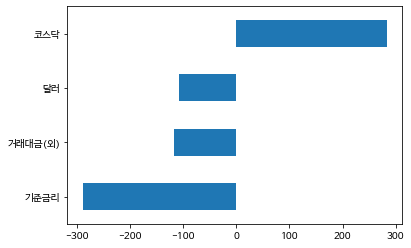

In [91]:
feature_all = pd.Series(rcv_all.coef_, x_all.columns).sort_values()
feature_all.plot.barh()
plt.show();

**월별 데이터의 RidgeCV, LassoCV**

In [53]:
ralpha = np.arange(1,100, 1)

rcv_mon = RidgeCV(alphas=ralpha, cv = 10 )

rcv_mon.fit(x_train_mon, y_train_mon)

print(f"최적의 알파 : {rcv_mon.alpha_}")
print(f"훈련 스코어 :{rcv_mon.score(x_train_mon, y_train_mon):.2f}")
print(f"테스트 스코어 : {rcv_mon.score(x_test_mon, y_test_mon):.2f}")

최적의 알파 : 1
훈련 스코어 :0.95
테스트 스코어 : 0.92


In [54]:
lalpha = np.arange(1, 100, 1)

lcv_mon = LassoCV(alphas = lalpha, cv= 10, tol=1)
lcv_mon.fit(x_train_mon, y_train_mon)

print(f"최적의 알파 : {lcv_mon.alpha_}")
print(f"훈련스코어 : {lcv_mon.score(x_train_mon, y_train_mon):.2f}")
print(f"테스트 스코어 : {lcv_mon.score(x_test_mon, y_test_mon):.2f}")

최적의 알파 : 1
훈련스코어 : 0.86
테스트 스코어 : 0.85


- LassoCV는 관계가 있는것은 더 크게, 관계가 없는 것은 더 작게 만드는 특징이 있음
- 앞서 연관성이 크다고 판단된 주택판매가격과 소비자물가 중  주택판매가격의 연관성이 더 크다는 것을 알수 있음

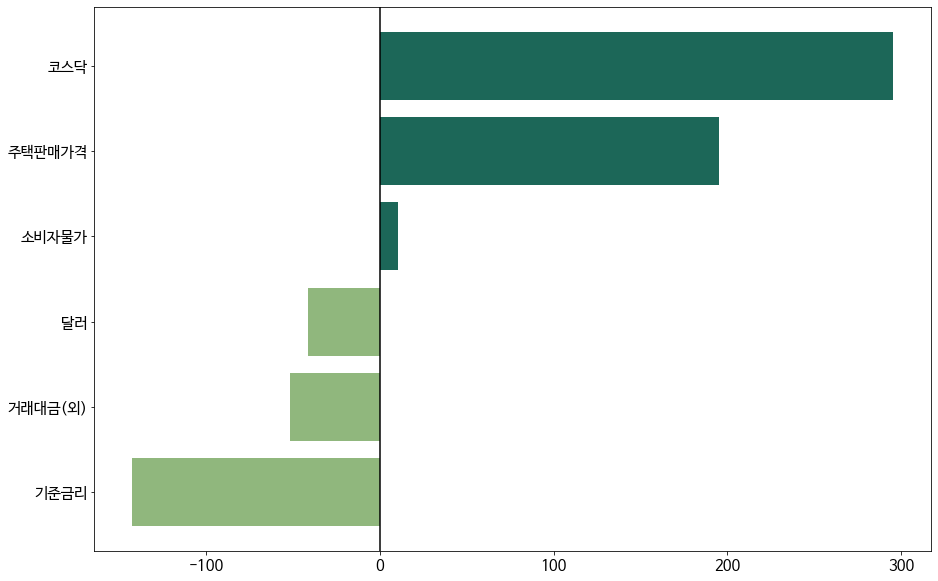

In [90]:
feature_mon = pd.Series(lcv_mon.coef_, x_month.columns).sort_values()
plt.figure(figsize=(15,10))
plt.axvline(0,color='black')
plt.barh(feature_mon.index, feature_mon, color = '#1C6758')
plt.barh(np.arange(3), feature_mon[:3],color='#90B77D')
plt.xticks(fontsize = 15)
plt.yticks( fontsize=15)
plt.show()

# 결론 및 후기

## 결론

**가설1. 각 지표들은 주식과 연관이 있을 것이다.**
- 코스닥, 주택판매가격, 소비자물가는 코스피와 양의 상관관계를 가지고, 달러, 기준금리, 외국인 거래대금은 음의 상관관계를 가짐

**가설2. 연관있는 지표들을 기반으로 주식의 적절한 구매시기를 예측할 수 있다.**
- 외국인의 급격한 매도세는 코스피의 하락신호 
- 달러와 금리의 동반 상승은 코스피의 하락신호
- 구매 시기는 예측할 수 없었다.

**그 외**
- 주택판매가격, 물가상승률은 코스피처럼 변동성이 크지는 않으나, 지속적으로 꾸준히 올랐으며, 코스피도 변동성이 크긴 하나 결국 꾸준히 올라왔다. 즉, 주식도 매도하지 않고 유지하면 결국 오를 것이다.

## 회고
- 직접 데이터를 선택해서 한정적인 데이터로 프로젝트를 진행하다보니 에러사항이 많았다.
- 너무 뻔한 결말이 도출되었다.
- 모델 사용에 대한 숙련도가 낮았다.

## **추후 프로젝트 아이디어**
- 물가, 금리, 환율, 부동산이 나스닥과 코스피 어디에 더 영향을 미칠까?(미국기준금리, 나스닥, 다우)

- 삼성전자와 코스피의 추세가 비례하는가?   
코스피<=> 코스닥 or 나스닥<=>다우지수


- 종목별 주식의 계절성이 있는가? 연말, 여름주, 태풍주, 주가의 경향성(업종에 따른 추세), 감자, 유증, 무증, 거래정지

- 정당별 경제상황 주식,  부동산 어느정당이 더 잘했나?

- 투자자의 위험회피성향 -> 1종오류가 중요한지 2종오류가 중요한지-> 회귀니까 mse mae 등등

- 회귀문제 : 학습이 데이터가 대칭인지 비대칭인지 확인
- 인사이트 : 0.4점 넘으면 알람이 오게끔 하라

- 주가가 임계치를 기준으로 오를지, 내릴지
종가를 기준으로 오를지 내릴지